## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv('data_EDA.csv')

#### Show Top 5 Records

In [8]:
df.head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,weekday,hour,distance_miles,azimuth,est_fare,act_fare,JFK_Airport,LGA_Airport,EWR_Airport
0,26:21.0,-73.844311,40.721319,-73.841610,40.712278,2009,6,0,17,-0.446653,167.192697,1.410844,1.504077,0,0,0
1,52:16.0,-74.016048,40.711303,-73.979268,40.782004,2010,1,1,16,1.657566,21.573931,2.748316,2.827314,0,0,0
2,35:00.0,-73.982738,40.761270,-73.991242,40.750562,2011,8,3,0,-0.147145,-148.869017,1.538569,1.740466,0,0,0
3,30:42.0,-73.987130,40.733143,-73.991567,40.758092,2012,4,5,4,0.552290,-7.701492,1.923236,2.041220,0,0,0
4,51:00.0,-73.968095,40.768008,-73.956655,40.783762,2010,3,1,7,0.216492,28.896195,1.723531,1.667707,0,0,0


#### Preparing X and Y variables

In [13]:
X = df.drop(columns=['act_fare','key'],axis=1)

In [14]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,weekday,hour,distance_miles,azimuth,est_fare,JFK_Airport,LGA_Airport,EWR_Airport
0,-73.844311,40.721319,-73.841610,40.712278,2009,6,0,17,-0.446653,167.192697,1.410844,0,0,0
1,-74.016048,40.711303,-73.979268,40.782004,2010,1,1,16,1.657566,21.573931,2.748316,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2011,8,3,0,-0.147145,-148.869017,1.538569,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,2012,4,5,4,0.552290,-7.701492,1.923236,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,2010,3,1,7,0.216492,28.896195,1.723531,0,0,0


In [15]:
y = df['act_fare']

In [16]:
y

0         1.504077
1         2.827314
2         1.740466
3         2.041220
4         1.667707
            ...   
238560    1.808289
238561    2.442347
238562    1.504077
238563    2.351375
238564    1.945910
Name: act_fare, Length: 238565, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled.shape

(238565, 14)

In [23]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((190852, 14), (47713, 14))

#### Create an Evaluate Function to give all metrics after model Training

In [24]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2335
- Mean Absolute Error: 0.1701
- R2 Score: 0.8392
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2296
- Mean Absolute Error: 0.1694
- R2 Score: 0.8437


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5823
- Mean Absolute Error: 0.4565
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5809
- Mean Absolute Error: 0.4547
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2335
- Mean Absolute Error: 0.1701
- R2 Score: 0.8392
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2296
- Mean Absolute Error: 0.1694
- R2 Score: 0.8437


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1815
- Mean Absolute Error: 0.1290
- R2 Score: 0.9029
----------------------

### Results

In [30]:
# Round each element in the r2_list to 4 decimal places
rounded_r2_list = [round(r2, ndigits=4) for r2 in r2_list]

# Create a DataFrame
df = pd.DataFrame(list(zip(model_list, rounded_r2_list)), columns=['Model Name', 'R2_Score'])

# Sort the DataFrame by R2_Score in descending order
df_sorted = df.sort_values(by=["R2_Score"], ascending=False)

df_sorted

,Model Name,R2_Score
6,XGBRegressor,0.8942
5,Random Forest Regressor,0.8859
3,K-Neighbors Regressor,0.8558
0,Linear Regression,0.8437
2,Ridge,0.8437
4,Decision Tree,0.7613
7,AdaBoost Regressor,0.6433
1,Lasso,-0.0000


## Linear Regression

In [32]:
lin_model = RandomForestRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.56


## Plot y_pred and y_test

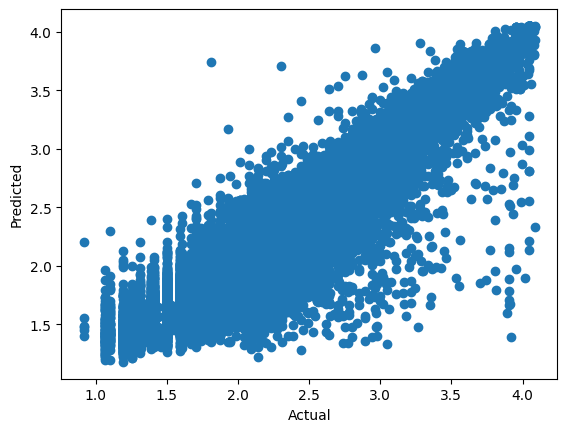

In [33]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

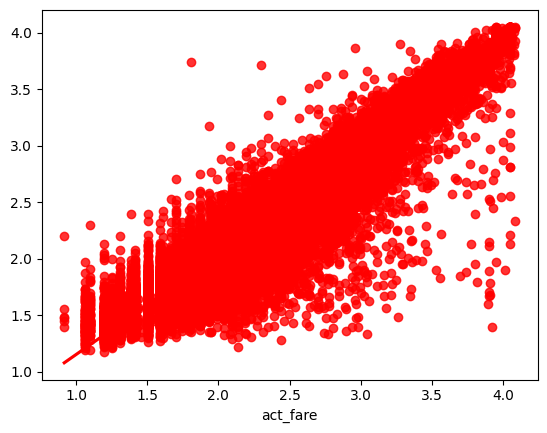

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [28]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
